In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# Load the dataset
us_crime = pd.read_excel("us_crime.xlsx")  

statistics = us_crime.agg(
    ['mean', 'median', 'std', 'var']
)

# Display the statistics
print("Statistics for each feature:")
print(statistics)



Statistics for each feature:
                M        So         Ed       Po1       Po2        LF  \
mean    13.857447  0.340426  10.563830  8.500000  8.023404  0.561191   
median  13.600000  0.000000  10.800000  7.800000  7.300000  0.560000   
std      1.256763  0.478975   1.118700  2.971897  2.796132  0.040412   
var      1.579454  0.229417   1.251489  8.832174  7.818353  0.001633   

              M.F          Pop          NW        U1        U2         Wealth  \
mean    98.302128    36.617021   10.112766  0.095468  3.397872    5253.829787   
median  97.700000    25.000000    7.600000  0.092000  3.400000    5370.000000   
std      2.946737    38.071188   10.282882  0.018029  0.844545     964.909442   
var      8.683256  1449.415356  105.737660  0.000325  0.713256  931050.231267   

             Ineq      Prob       Time          Crime  
mean    19.400000  0.047091  26.597921     905.085106  
median  17.600000  0.042100  25.800600     831.000000  
std      3.989606  0.022737   7.0868

In [103]:
# Calculate the crime rate mean
crime_rate_mean = us_crime['Crime'].mean()

# Calculate the standard deviation of the crime rate
crime_rate_std = us_crime['Crime'].std()

# Determine the sample size
n = len(us_crime['Crime'])

# Calculate the standard error
standard_error = crime_rate_std / np.sqrt(n)

# Define the confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Get the t-score for the 95% confidence interval (two-tailed)
t_score = stats.t.ppf(1 - alpha / 2, df=n - 1)  # degrees of freedom = n - 1

# Calculate the margin of error
margin_of_error = t_score * standard_error

# Calculate the confidence interval
confidence_interval = (crime_rate_mean - margin_of_error, crime_rate_mean + margin_of_error)

# Print the results
print("Mean crime rate:", crime_rate_mean)
print("Standard deviation of crime rate:", crime_rate_std)
print("Confidence Interval (95%):", confidence_interval)


Mean crime rate: 905.0851063829788
Standard deviation of crime rate: 386.7626971461865
Confidence Interval (95%): (791.5273245390288, 1018.6428882269288)


In [3]:
from scipy.stats import t, ttest_ind, pearsonr
import numpy as np
import pandas as pd

# Load your dataset (assuming it is an Excel file)
data = pd.read_excel("us_crime.xlsx")

# Separate crime rates for southern and non-southern states
crime_rate_south = data[data['So'] == 1]['Crime']
crime_rate_non_south = data[data['So'] == 0]['Crime']

# Calculate means for each group
mean_south = crime_rate_south.mean()
mean_non_south = crime_rate_non_south.mean()

# Calculate standard deviations for each group
std_south = crime_rate_south.std()
std_non_south = crime_rate_non_south.std()

# Determine the sample sizes for each group
n_south = len(crime_rate_south)
n_non_south = len(crime_rate_non_south)

# Calculate the standard error for the difference in means
standard_error_diff = np.sqrt((std_south**2 / n_south) + (std_non_south**2 / n_non_south))

# Define the confidence level (e.g., 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Get the t-score for the confidence level with degrees of freedom
df = min(n_south, n_non_south) - 1  # Use the smaller sample's degrees of freedom
t_score = t.ppf(1 - alpha / 2, df)

# Calculate the margin of error for the difference in means
margin_of_error = t_score * standard_error_diff

# Calculate the confidence interval for the difference in means
difference_in_means = mean_south - mean_non_south
confidence_interval = (difference_in_means - margin_of_error, difference_in_means + margin_of_error)

# Print the results
print("Mean crime rate (South):", mean_south)
print("Standard deviation crime rate (South):", std_south)
print("Mean crime rate (Non-South):", mean_non_south)
print("Standard deviation crime rate (Non-South):", std_non_south)
print("Difference in mean crime rates:", difference_in_means)
print("Confidence Interval (95%) for difference in means:", confidence_interval)

# Define a function to perform two-sample t-tests
def perform_ttest(data, factor, outcome='Crime', alpha=0.05, beta=0.01):
    median_value = data[factor].median()
    group1 = data[data[factor] >= median_value][outcome]
    group2 = data[data[factor] < median_value][outcome]
    
    # Perform two-sample t-test
    t_stat, p_value = ttest_ind(group1, group2)
    
    # Display results
    print(f"\nT-Test for Factor: {factor}")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < alpha:
        print("Result: Statistically significant at 0.05 significance level")
    else:
        print("Result: Not statistically significant at 0.05 significance level")
    if p_value < beta:
        print("Result: Statistically significant at 0.01 significance level")
    else:
        print("Result: Not statistically significant at 0.01 significance level")

# Define a function to perform Pearson correlation
def perform_pearson_corr(data, factor, outcome='Crime', alpha=0.05, beta=0.01):
    correlation, p_value = pearsonr(data[factor], data[outcome])
    
    # Display results
    print(f"\nPearson Correlation for Factor: {factor}")
    print(f"Correlation Coefficient: {correlation:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < alpha:
        print("Result: Statistically significant at 0.05 significance level")
    else:
        print("Result: Not statistically significant at 0.05 significance level")
    if p_value < beta:
        print("Result: Statistically significant at 0.01 significance level")
    else:
        print("Result: Not statistically significant at 0.01 significance level")

# List of factors to analyze
factors = ['Ed', 'Ineq', 'U1', 'U2', 'LF', 'Po1', 'Po2', 'M', 'NW', 'Wealth', 'Time']

# Perform t-tests and Pearson correlation tests for each factor
for factor in factors:
    perform_ttest(data, factor)
    perform_pearson_corr(data, factor)


Mean crime rate (South): 856.8125
Standard deviation crime rate (South): 270.1760460021083
Mean crime rate (Non-South): 930.0
Standard deviation crime rate (Non-South): 437.01540781380544
Difference in mean crime rates: -73.1875
Confidence Interval (95%) for difference in means: (-293.90234978081355, 147.52734978081352)

T-Test for Factor: Ed
T-statistic: 1.07
P-value: 0.2895
Result: Not statistically significant at 0.05 significance level
Result: Not statistically significant at 0.01 significance level

Pearson Correlation for Factor: Ed
Correlation Coefficient: 0.32
P-value: 0.0269
Result: Statistically significant at 0.05 significance level
Result: Not statistically significant at 0.01 significance level

T-Test for Factor: Ineq
T-statistic: -1.13
P-value: 0.2652
Result: Not statistically significant at 0.05 significance level
Result: Not statistically significant at 0.01 significance level

Pearson Correlation for Factor: Ineq
Correlation Coefficient: -0.18
P-value: 0.2286
Result: 

Intercept: 469.1778548139834
Slope for Po1: 116.420158316571
Slope for Wealth: -0.10538295234976422
Mean Squared Error (MSE): 73335.19109435847
R-squared (R^2): 0.49908585702992203


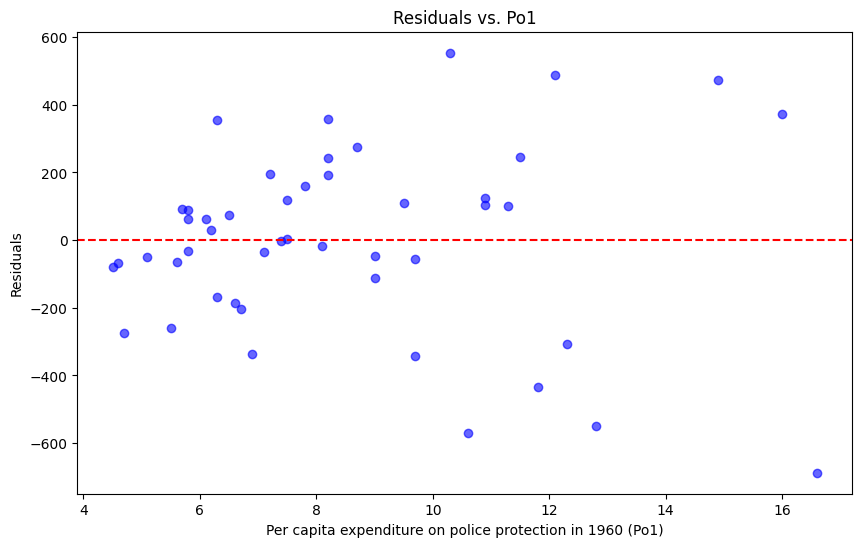

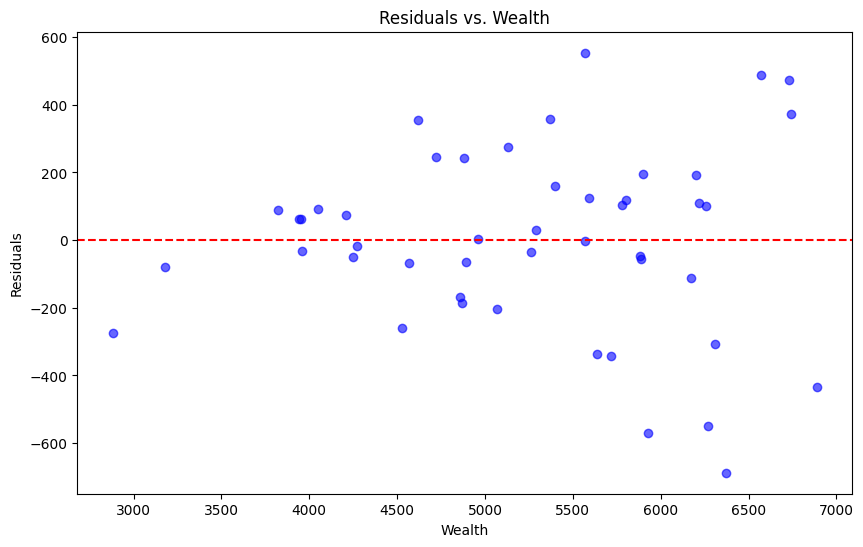

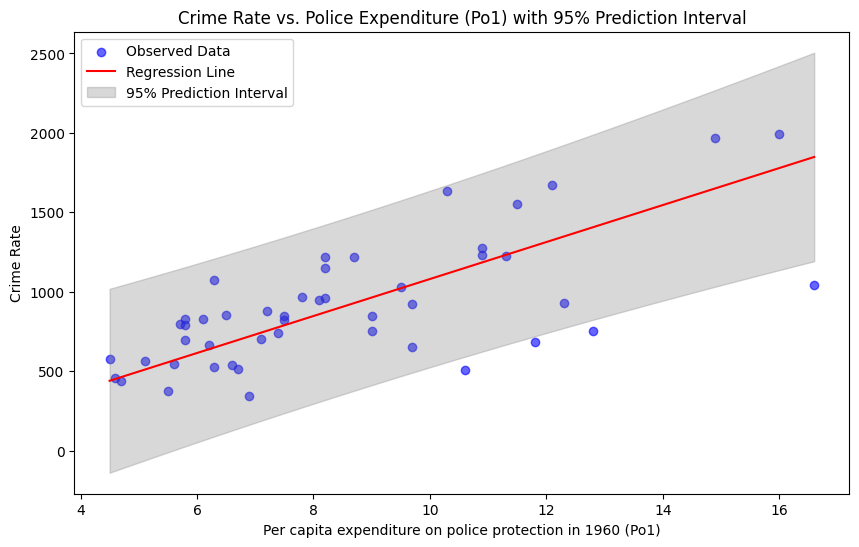

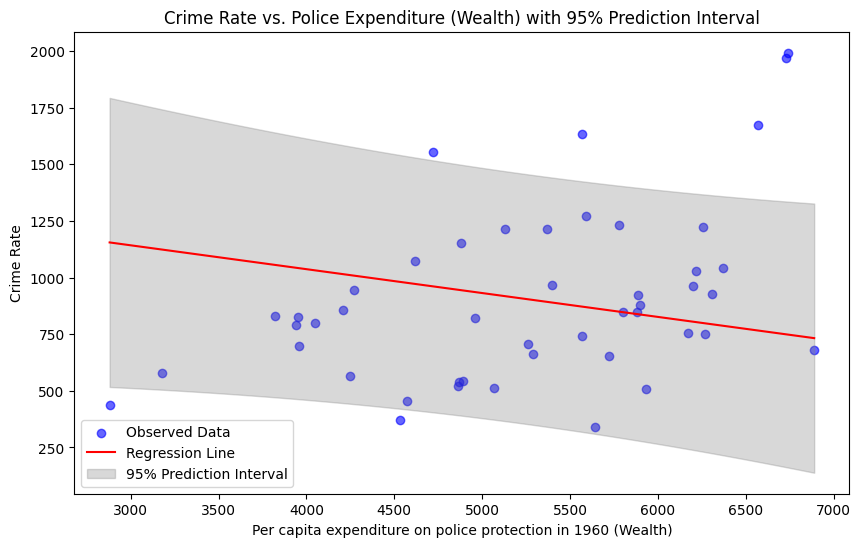

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Load the dataset
data = pd.read_excel("us_crime.xlsx")

# Select predictors and target
X = data[['Po1', 'Wealth']]
y = data['Crime']

# Add a column of ones for the intercept
X_with_intercept = np.column_stack((np.ones(len(X)), X))

# Calculate the coefficients
beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

# Separate the intercept and slopes
intercept, slope_po1, slope_wealth = beta

# Predicted values based on the model
y_pred = X_with_intercept @ beta

# Calculate residuals
residuals = y - y_pred
n = len(y)
p = X_with_intercept.shape[1] - 1  # Number of predictors (excluding intercept)

# Calculate Mean Squared Error (MSE) and R-squared (R^2)
mse = np.mean(residuals**2)
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Intercept: {intercept}")
print(f"Slope for Po1: {slope_po1}")
print(f"Slope for Wealth: {slope_wealth}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r_squared}")

# Define confidence level and t-score for prediction interval
confidence_level = 0.95
alpha = 1 - confidence_level
t_score = t.ppf(1 - alpha / 2, df=n - p - 1)

# Residuals vs Po1 Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Po1'], residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Per capita expenditure on police protection in 1960 (Po1)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Po1")
plt.show()

# Residuals vs Wealth Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Wealth'], residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Wealth")
plt.ylabel("Residuals")
plt.title("Residuals vs. Wealth")
plt.show()

# For the prediction interval around Po1
po1_range = np.linspace(data['Po1'].min(), data['Po1'].max(), 100)
po1_X = np.column_stack((np.ones(len(po1_range)), po1_range, np.mean(data['Wealth']) * np.ones(len(po1_range))))
predicted_crime_rate_po1 = po1_X @ beta

# Calculate the prediction intervals
se_line_po1 = np.sqrt(mse * (1 + np.sum(np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ po1_X.T * po1_X.T, axis=0)))
prediction_interval_upper_po1 = predicted_crime_rate_po1 + t_score * se_line_po1
prediction_interval_lower_po1 = predicted_crime_rate_po1 - t_score * se_line_po1

# Plot: Crime Rate vs. Po1 with prediction intervals
plt.figure(figsize=(10, 6))

# Scatter plot of observed data points
plt.scatter(data['Po1'], y, color='blue', label='Observed Data', alpha=0.6)

# Plot the regression line using predicted values
plt.plot(po1_range, predicted_crime_rate_po1, color='red', label='Regression Line')

# Plot the prediction intervals
plt.fill_between(po1_range, prediction_interval_lower_po1, prediction_interval_upper_po1, color='gray', alpha=0.3, label='95% Prediction Interval')

# Add labels, title, and legend
plt.xlabel("Per capita expenditure on police protection in 1960 (Po1)")
plt.ylabel("Crime Rate")
plt.title("Crime Rate vs. Police Expenditure (Po1) with 95% Prediction Interval")
plt.legend()
plt.show()

# Wealth_range for prediction
Wealth_range = np.linspace(data['Wealth'].min(), data['Wealth'].max(), 100)
Wealth_X = np.column_stack((np.ones(len(Wealth_range)), np.mean(data['Po1']) * np.ones(len(Wealth_range)), Wealth_range))
predicted_crime_rate_wealth = Wealth_X @ beta

# Calculate the prediction intervals for Wealth
se_line_wealth = np.sqrt(mse * (1 + np.sum(np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ Wealth_X.T * Wealth_X.T, axis=0)))
prediction_interval_upper_wealth = predicted_crime_rate_wealth + t_score * se_line_wealth
prediction_interval_lower_wealth = predicted_crime_rate_wealth - t_score * se_line_wealth

# Plot: Crime Rate vs. Wealth with prediction intervals
plt.figure(figsize=(10, 6))

# Scatter plot of observed data points
plt.scatter(data['Wealth'], y, color='blue', label='Observed Data', alpha=0.6)

# Plot the regression line using predicted values
plt.plot(Wealth_range, predicted_crime_rate_wealth, color='red', label='Regression Line')

# Plot the prediction intervals
plt.fill_between(Wealth_range, prediction_interval_lower_wealth, prediction_interval_upper_wealth, color='gray', alpha=0.3, label='95% Prediction Interval')

# Add labels, title, and legend
plt.xlabel("Per capita expenditure on police protection in 1960 (Wealth)")
plt.ylabel("Crime Rate")
plt.title("Crime Rate vs. Police Expenditure (Wealth) with 95% Prediction Interval")
plt.legend()
plt.show()
